In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import statistics

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data= pd.read_csv(clinical_trial_data_to_load)

clinical_data
# Combine the data into a single dataset
merged_data= pd.merge(mouse_data, clinical_data, how="left", on="Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_response = merged_data.groupby(["Drug","Timepoint"])
tumor_response_mean = tumor_response["Tumor Volume (mm3)"].mean()


# # Convert to DataFrame
tumor_response_mean_df = pd.DataFrame({"Tumor Volume (mm3)":tumor_response_mean})

# # Preview DataFrame
tumor_response_mean_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

tumor_response_sem= merged_data.groupby(["Drug","Timepoint"]).agg({"Tumor Volume (mm3)":"sem"})
tumor_response_sem_df = pd.DataFrame(tumor_response_sem)
tumor_response_sem_df.head()



Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [5]:
# Minor Data Munging to Re-Format the Data Frames
tumor_response_pivot = tumor_response_mean_df.pivot_table(index="Timepoint",columns="Drug")
# Preview that Reformatting worked
tumor_response_pivot

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

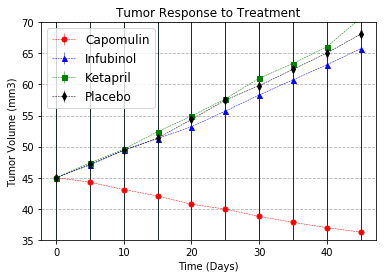

<Figure size 432x288 with 0 Axes>

In [6]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0,50,5)

plt.figure(figsize=(6,4))

plt.errorbar(x_axis, tumor_response_pivot["Tumor Volume (mm3)"]["Capomulin"],\
             yerr=tumor_response_pivot["Tumor Volume (mm3)"]["Capomulin"],\
             color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50
            )

plt.errorbar(x_axis, tumor_response_pivot["Tumor Volume (mm3)"]["Infubinol"],\
             yerr=tumor_response_pivot["Tumor Volume (mm3)"]["Infubinol"],\
             color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50
            )

plt.errorbar(x_axis, tumor_response_pivot["Tumor Volume (mm3)"]["Ketapril"],\
             yerr=tumor_response_pivot["Tumor Volume (mm3)"]["Ketapril"],\
             color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50
            )

plt.errorbar(x_axis, tumor_response_pivot["Tumor Volume (mm3)"]["Placebo"],\
             yerr=tumor_response_pivot["Tumor Volume (mm3)"]["Placebo"],\
             color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50
            )

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")


plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=12, fancybox=True)


plt.ylim(35,70)
plt.show()

# Save the Figure
plt.savefig("TumorResponse.png")


In [7]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [12]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

mest_response = merged_data.groupby(["Drug","Timepoint"])
mest_response_mean = mest_response["Metastatic Sites"].mean()

# Convert to DataFrame
mest_response_mean_df=pd.DataFrame(mest_response_mean)
# Preview DataFrame
mest_response_mean_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [14]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint

mest_response_sem = mest_response["Metastatic Sites"].sem()

# Convert to DataFrame
mest_response_sem_df = pd.DataFrame(mest_response_sem)

# Preview DataFrame
mest_response_sem_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [15]:
# Minor Data Munging to Re-Format the Data Frames
mest_pivot = mest_response_mean_df.pivot_table(index="Timepoint",columns="Drug")

# Preview that Reformatting worked
mest_pivot

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   
25                0.818182  1.500000  1.277778  1.631579  1.500000  1.941176   
30                1.090909  1.937500  1.588235  2.055556  2.066667  2.266667   
35                1.181818  2.071429  1.666667  2.294118  2.266667  2.642857   
40                1.380952  2.357143  2.100000  2.733333  2.466667  3.166667   
45                1.476190  2.692308  2.111111  3.363636  2.538462  3.272727   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118  
25         1.357143  0.652174  1.157895  1.687500  
30         1.615385  0.782609  1.388889  1.933333  
35         2.300000  0.952381  1.562500  2.285714  
40         2.777778  1.100000  1.583333  2.785714  
45         2.571429  1.250000  1.727273  3.071429

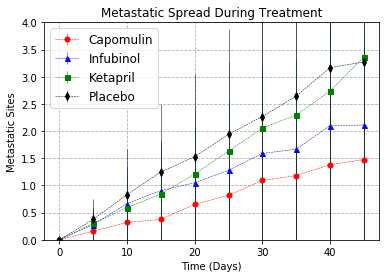

<Figure size 432x288 with 0 Axes>

In [16]:
x_axis = np.arange(0,50,5)

plt.figure(figsize=(6,4))

plt.errorbar(x_axis, mest_pivot["Metastatic Sites"]["Capomulin"],\
             yerr=mest_pivot["Metastatic Sites"]["Capomulin"],\
             color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50
            )

plt.errorbar(x_axis, mest_pivot["Metastatic Sites"]["Infubinol"],\
             yerr=mest_pivot["Metastatic Sites"]["Infubinol"],\
             color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50
            )

plt.errorbar(x_axis, mest_pivot["Metastatic Sites"]["Ketapril"],\
             yerr=mest_pivot["Metastatic Sites"]["Ketapril"],\
             color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50
            )

plt.errorbar(x_axis, mest_pivot["Metastatic Sites"]["Placebo"],\
             yerr=mest_pivot["Metastatic Sites"]["Placebo"],\
             color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50
            )

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")


plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=12, fancybox=True)


plt.ylim(0,4,0.5)
plt.show()

# Save the Figure
plt.savefig("MestaticSpread.png")

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [17]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = merged_data.groupby(["Drug", "Timepoint"]).count()
# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count["Mouse ID"])
# Preview DataFrame
mice_count_df.head()


Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [18]:
# Minor Data Munging to Re-Format the Data Frames
mice_pivot= mice_count_df.pivot_table(index="Timepoint",columns="Drug")

# Preview the Data Frame
mice_pivot

Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   
25               22       18        18       19       18      17       14   
30               22       16        17       18       15      15       13   
35               22       14        12       17       15      14       10   
40               21       14        10       15       15      12        9   
45               21       13         9       11       13      11        7   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17  
25              23       19        16  
30              23       18        15  
35              21       16        14  
40              20       12        14  
45              20       11        14

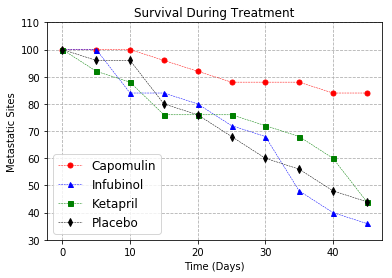

<Figure size 432x288 with 0 Axes>

In [19]:
x_axis = np.arange(0,50,5)

plt.plot(x_axis, (mice_pivot["Mouse ID"]["Capomulin"]/25)*100,"ro",\
         linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(x_axis, (mice_pivot["Mouse ID"]["Infubinol"]/25)*100,"b^",\
         linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(x_axis, (mice_pivot["Mouse ID"]["Ketapril"]/25)*100,"gs",\
         linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(x_axis, (mice_pivot["Mouse ID"]["Placebo"]/25)*100,"kd",\
         linestyle="dashed", markersize=5, linewidth=0.50)


plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")


plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=12, fancybox=True)


plt.ylim(30, 110)
plt.show()

# Save the Figure
plt.savefig("SurvivalRate.png")

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [47]:
# Calculate the percent changes for each drug
tumor_response_pivot
value_1 = tumor_response_pivot.iloc[-1] 
value_2 = tumor_response_pivot.iloc[0]

result = 100* ((value_1 - value_2) / value_2)



# Display the data to confirm
result_values= result.values
result_drugs = result.index.tolist()

result

                    Drug     
Tumor Volume (mm3)  Capomulin   -19.475303
                    Ceftamin     42.516492
                    Infubinol    46.123472
                    Ketapril     57.028795
                    Naftisol     53.923347
                    Placebo      51.297960
                    Propriva     47.241175
                    Ramicane    -22.320900
                    Stelasyn     52.085134
                    Zoniferol    46.579751
dtype: float64

'-19%'

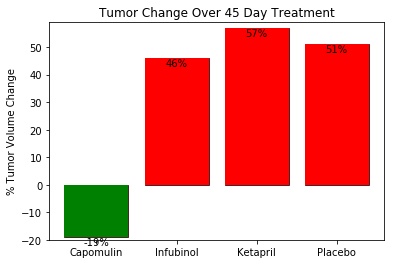

In [129]:
# Store all Relevant Percent Changes into a Tuple
pct_changes_name = ("Capomulin","Infubinol", "Ketapril","Placebo")
pct_changes_values = (int(result_values[0]), int(result_values[2]), int(result_values[3]), int(result_values[5]))              

x_axis = np.arange(0,len(pct_changes_name),1)

plt.xlim = (1, x_axis)
plt.ylim(-20,59)

tumor_change_bar = plt.bar(x_axis, pct_changes_values, color="red", alpha=1.0, edgecolor='black', linewidth=0.7)





# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 

plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")

tick_locations =[x for x in x_axis ]
plt.xticks(tick_locations, ["Capomulin", "Infubinol", "Ketapril", "Placebo"])


# Use functions to label the percentages of changes

cr = ['g','r','r','r']
#fig,x_axis = plt.subplots()
plt.bar(x_axis,pct_changes_values,color=cr)

def setValues(x):
    
    plt.text(x_axis[x], pct_changes_values[x], str(pct_changes_values[x]) + '%', ha="center", va="top")
# Call functions to implement the function calls

[setValues(x)for x in x_axis]


    
# Save the Figure


# Show the Figure
# plt.show()
#fig.show()

str(pct_changes_values[0]) + '%'

"{}%".format(pct_changes_values[0])
f"{pct_changes_values[0]}%"

![Metastatic Spread During Treatment](../Images/change.png)